## 特征匹配

Brute-Force匹配

In [1]:
import cv2
import numpy as np

In [2]:
img1=cv2.imread('box.png',0)
img2=cv2.imread('box_in_scene.png',0)

In [3]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
cv_show('img1',img1)

In [5]:
cv_show('img2',img2)

In [6]:
sift=cv2.xfeatures2d.SIFT_create()
# xfeatures2d.SIFT_create()是opencv3.x的版本，opencv2.x版本是cv2.SIFT()，
# 其中SIFT_create()是创建一个SIFT对象

In [7]:
kp1,des1=sift.detectAndCompute(img1,None) 
# detectAndCompute()是SIFT对象的方法，用于检测关键点和计算描述符
kp2,des2=sift.detectAndCompute(img2,None)

In [8]:
bf=cv2.BFMatcher(crossCheck=True) 
# crossCheck=True表示匹配时只返回匹配点对，
# 例如，如果A中的点i与B中的点j匹配，则只返回(i,j)对，而不返回(j,i)对
# NORM_L2表示归一化的欧氏距离

1对1的匹配

In [9]:
matches=bf.match(des1,des2) 
# match()是BFMatcher对象的方法，用于匹配描述符
matches=sorted(matches,key=lambda x:x.distance) 
# sorted()函数用于对匹配点对按照距离进行排序

In [10]:
img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2) 
# 绘制匹配点对,其中matches[:10]表示只绘制前10个匹配点对,flags=2表示绘制匹配点对连线

In [11]:
cv_show('img3',img3)

k对最佳匹配

In [12]:
bf=cv2.BFMatcher() 
# BFMatcher()是创建一个BFMatcher对象,用来进行k对最佳匹配

In [13]:
matches=bf.knnMatch(des1,des2,k=2) 
# knnMatch()是BFMatcher对象的方法，用于k对最佳匹配,其中k表示匹配的个数

In [14]:
good=[]
for m,n in matches:
    if m.distance<0.75*n.distance:
        good.append([m])

In [15]:
img3=cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

In [16]:
cv_show('img3',img3)

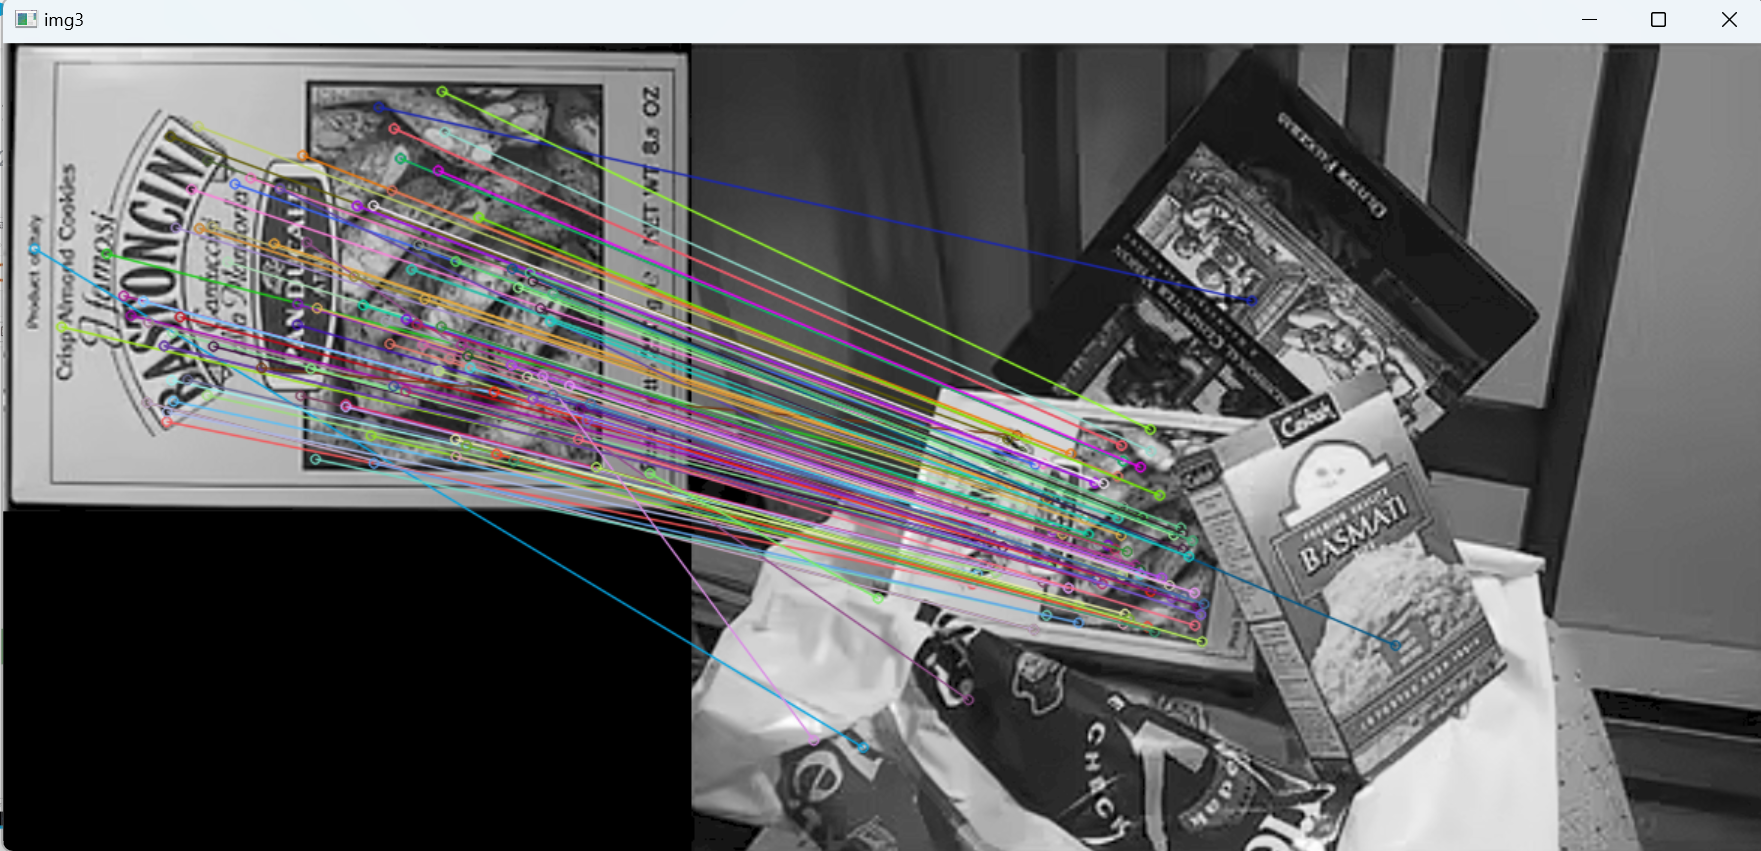

#### 随机抽样一致算法（Random Sample Consensus，RANSAC）

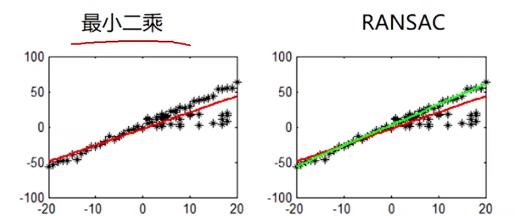

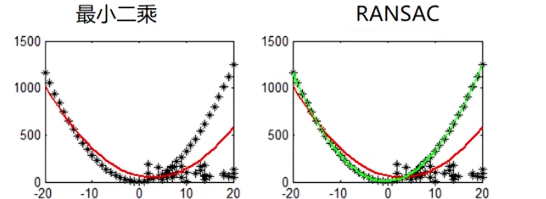

最小二乘与RANSAC对比，最小二乘法在数据量较少时效果较好，但数据量较大时，鲁棒性较差，容易受到异常值的影响。RANSAC算法在数据量较大时，鲁棒性较好，能够有效地过滤掉异常值，但计算量较大。

先进行随机抽样（选择一部分数据点），然后根据这些数据点拟合模型，计算模型与剩余数据点的误差，如果误差小于设定的阈值（容忍范围），则认为这些数据点符合模型，否则认为这些数据点不符合模型。然后，根据符合模型的数据点重新拟合模型，直到找到最优的模型为止。

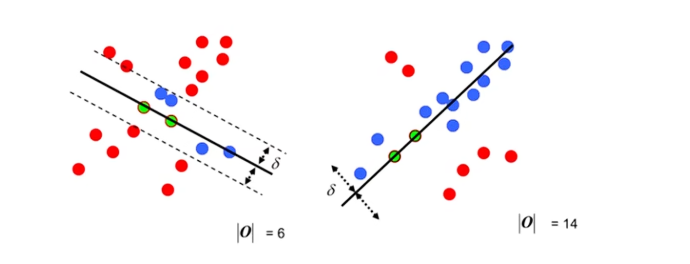

看哪一次的容忍范围局内点最多，就选哪一次的模型。

##### 单应性矩阵（Homography Matrix）

用于描述两个平面之间的映射关系，可以用于图像配准、图像拼接等任务。

最少有4个点就可以求单应性矩阵，因为4个点可以确定一个平面，而单应性矩阵描述的是两个平面之间的映射关系，所以需要4个点。

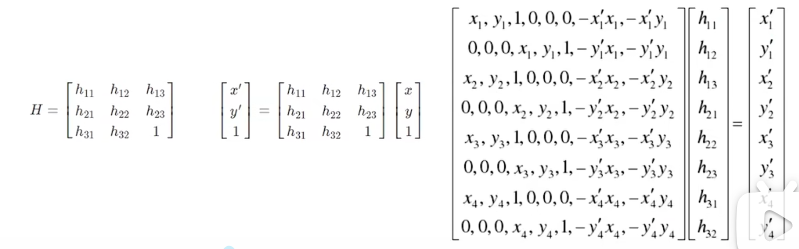

过滤掉异常值，保留局内点，然后根据局内点求单应性矩阵。